In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr, spearmanr, entropy, wasserstein_distance
from scipy.spatial.distance import jensenshannon, euclidean, cityblock

In [31]:
proj_dir = Path("..") / "Data/r77-mini-data-fortnight"
print(proj_dir.joinpath("input"))

data_dir = proj_dir
input_dir = data_dir.joinpath("input")
fixed_input_dir = input_dir.joinpath("fixed")
temporal_input_dir = input_dir.joinpath("temporal")
target_dir = data_dir.joinpath("target")
fixed_target_dir = target_dir.joinpath("fixed")
temporal_target_dir = target_dir.joinpath("temporal")

../Data/r77-mini-data-fortnight/input


In [32]:
sample_dir = Path("Samples_0")
files_sample = list(sample_dir.iterdir())

samples = np.load(files_sample[0]).squeeze()
samples.shape

(10, 3, 64)

In [7]:
files = list(temporal_target_dir.iterdir())

index_dir = Path("..")/"Index"
files_index = list(index_dir.iterdir())
indices = np.load(files_index[0]).squeeze()

#First hour of data
index = indices[0]
tt = np.load(files[index]).squeeze()
tt.shape

(144, 70, 100, 3)

In [9]:
tt_all = np.stack([
    np.transpose(np.load(files[indices[i]]).squeeze(), (0, 2, 3, 1))[:,:,:,:64].reshape(-1, 3, 64)
    for i in range(360)
])

data = tt_all.reshape(-1,3,64)
data.shape

(5184000, 3, 64)

In [33]:
random_indices = np.random.choice(data.shape[0], 10, replace=False)
training_data = data[random_indices]
training_data.shape

(10, 3, 64)

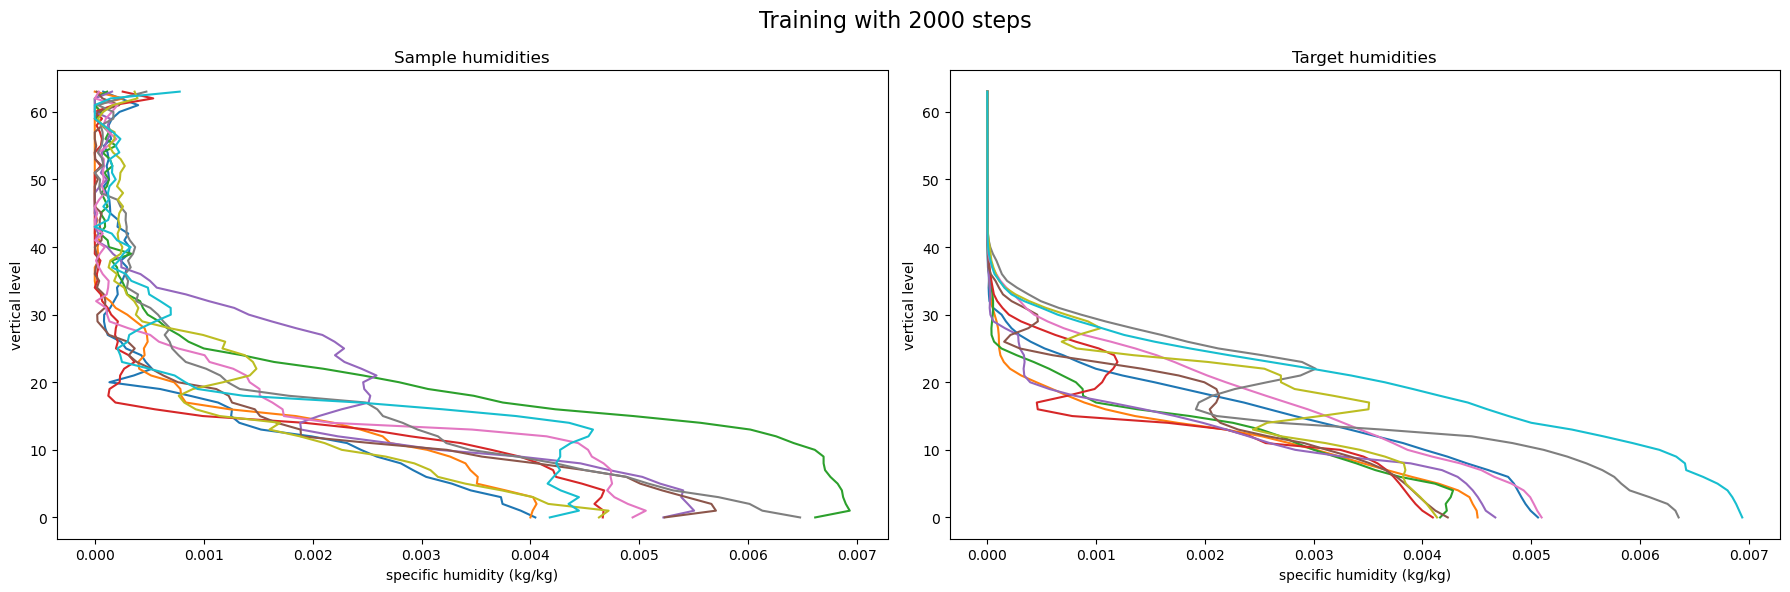

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#Sample humidities plot
sample_humidity = samples[:, 0, :] * 0.025
for i in range(10):
    axs[0].plot(sample_humidity[i], np.arange(64))
axs[0].set_xlabel("specific humidity (kg/kg)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Sample humidities")


# Target humidities plot
target_humidity = training_data[:, 0, :] * 0.025
for i in range(10):
    axs[1].plot(target_humidity[i], np.arange(64))
axs[1].set_xlabel("specific humidity (kg/kg)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Target humidities")

fig.suptitle("Training with 2000 steps", fontsize = 16)

plt.tight_layout()
plt.show()

In [47]:
# Statistical Similarity
mse = mean_squared_error(target_humidity, sample_humidity)
mae = mean_absolute_error(target_humidity, sample_humidity)
rmse = np.sqrt(mse)

sample_vector_reshaped = np.array(target_humidity).reshape(1, -1)
generated_vector_reshaped = np.array(sample_humidity).reshape(1, -1)
cosine_sim = cosine_similarity(sample_vector_reshaped, generated_vector_reshaped)[0][0]

#pearson_corr, _ = pearsonr(target_humidity, sample_humidity)
spearman_corr, _ = spearmanr(target_humidity, sample_humidity)

#Distribution Similarity
sample_dist = np.array(target_humidity) / np.sum(target_humidity)
generated_dist = np.array(sample_humidity) / np.sum(sample_humidity)

kl_div = entropy(sample_dist, generated_dist)
js_div = jensenshannon(sample_dist, generated_dist)
#emd = wasserstein_distance(target_humidity, sample_humidity)

# Distance Metrics
#euclidean_dist = euclidean(target_humidity, sample_humidity)
#manhattan_dist = cityblock(target_humidity, sample_humidity)



# Output Results
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
print(f"Cosine Similarity: {cosine_sim}")
print(f" Spearman Correlation: {spearman_corr}")
print(f"KL Divergence: {kl_div}, Jensen-Shannon Divergence: {js_div}")
#print(f"Earth Mover's Distance: {emd}")
#print(f"Euclidean Distance: {euclidean_dist}, Manhattan Distance: {manhattan_dist}")

MSE: 8.798858743830351e-07, MAE: 0.0005602670134976506, RMSE: 0.0009380223345942795
Cosine Similarity: 0.9123874306678772
 Spearman Correlation: [[ 1.          0.98787879  0.98787879 ... -0.21276694 -0.3404271
   0.21212121]
 [ 0.98787879  1.          1.         ... -0.27355749 -0.37082238
   0.24848485]
 [ 0.98787879  1.          1.         ... -0.27355749 -0.37082238
   0.24848485]
 ...
 [-0.21276694 -0.27355749 -0.27355749 ...  1.          0.25914634
  -0.38298049]
 [-0.3404271  -0.37082238 -0.37082238 ...  0.25914634  1.
   0.15805544]
 [ 0.21212121  0.24848485  0.24848485 ... -0.38298049  0.15805544
   1.        ]]
KL Divergence: [0.03302626 0.03555309 0.03717897 0.03511072 0.03971633 0.04332304
 0.04746258 0.04900988 0.05366883 0.06249384 0.07178075 0.07542863
 0.07709917 0.08513006 0.10267009 0.16164671 0.2173619  0.2860155
 0.375938   0.4236231  0.52280486 0.469355   0.49340576 0.59418666
 0.64370406 0.77258426 0.7111647  0.6365894  0.60326004 0.8131679
 0.8524171  0.6520838  0

In [50]:
js_div.shape

(64,)

In [41]:
target_humidity.shape


(10, 64)

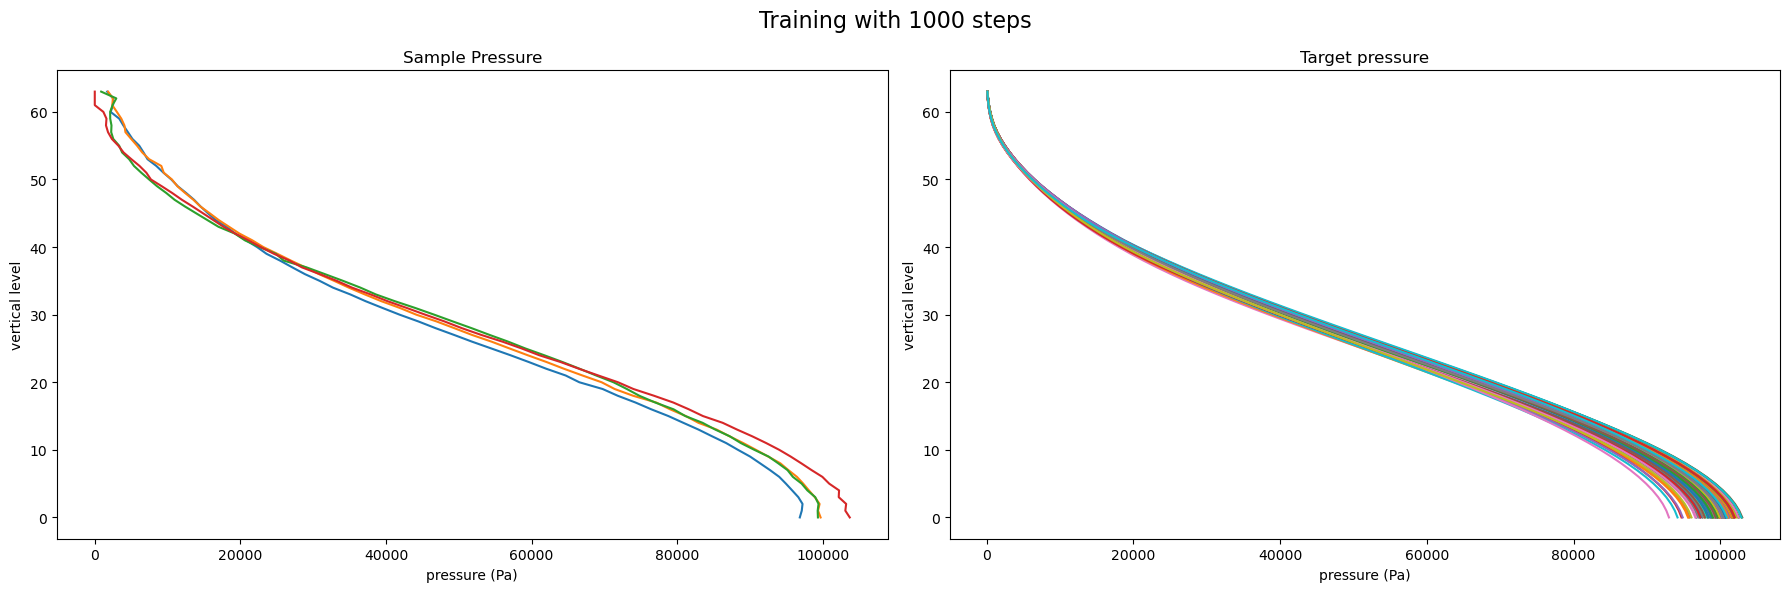

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#Sample pressure plot
sample_pressure = samples[:, 1, :] * 106000
for i in range(10):
    axs[0].plot(sample_pressure[i], np.arange(64))
axs[0].set_xlabel("pressure (Pa)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Sample Pressure")


# Target pressure plot
target_pressure = training_data[:, 1, :] * 106000
for i in range(100):
    axs[1].plot(target_pressure[i], np.arange(64))
axs[1].set_xlabel("pressure (Pa)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Target pressure")

fig.suptitle("Training with 2000 steps", fontsize = 16)

plt.tight_layout()
plt.show()

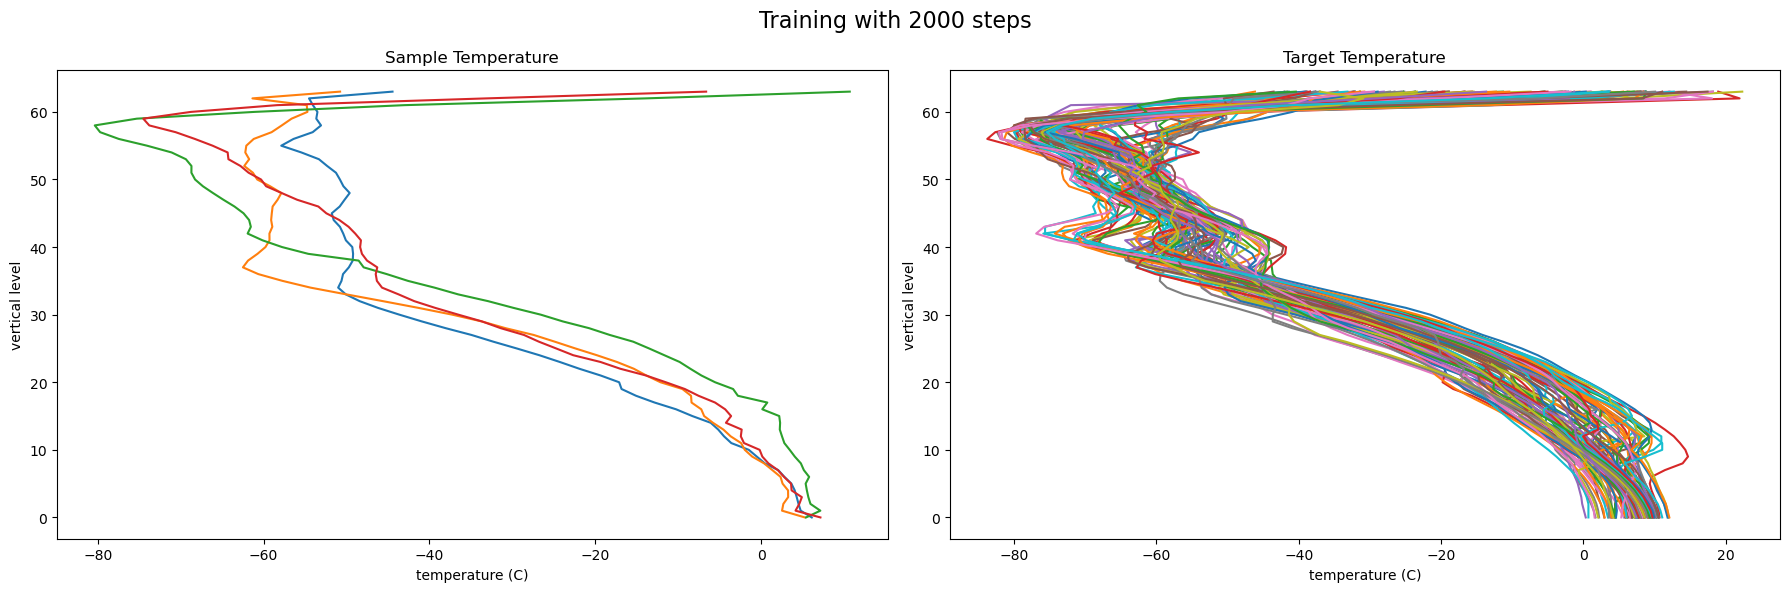

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#Sample temperature plot
sample_temperature = samples[:, 2, :] * 180 + 140 -273.15
for i in range(10):
    axs[0].plot(sample_temperature[i], np.arange(64))
axs[0].set_xlabel("temperature (C)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Sample Temperature")

# Target temperature plot
target_temperature = training_data[:, 2, :] * 180 + 140 -273.15
for i in range(100):
    axs[1].plot(target_temperature[i], np.arange(64))
axs[1].set_xlabel("temperature (C)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Target Temperature")

fig.suptitle("Training with 2000 steps", fontsize = 16)

plt.tight_layout()
plt.show()

In [20]:
sample_dir = Path("Samples_1")
files_sample = list(sample_dir.iterdir())

samples = np.load(files_sample[0]).squeeze()
samples.shape

(10, 3, 64)

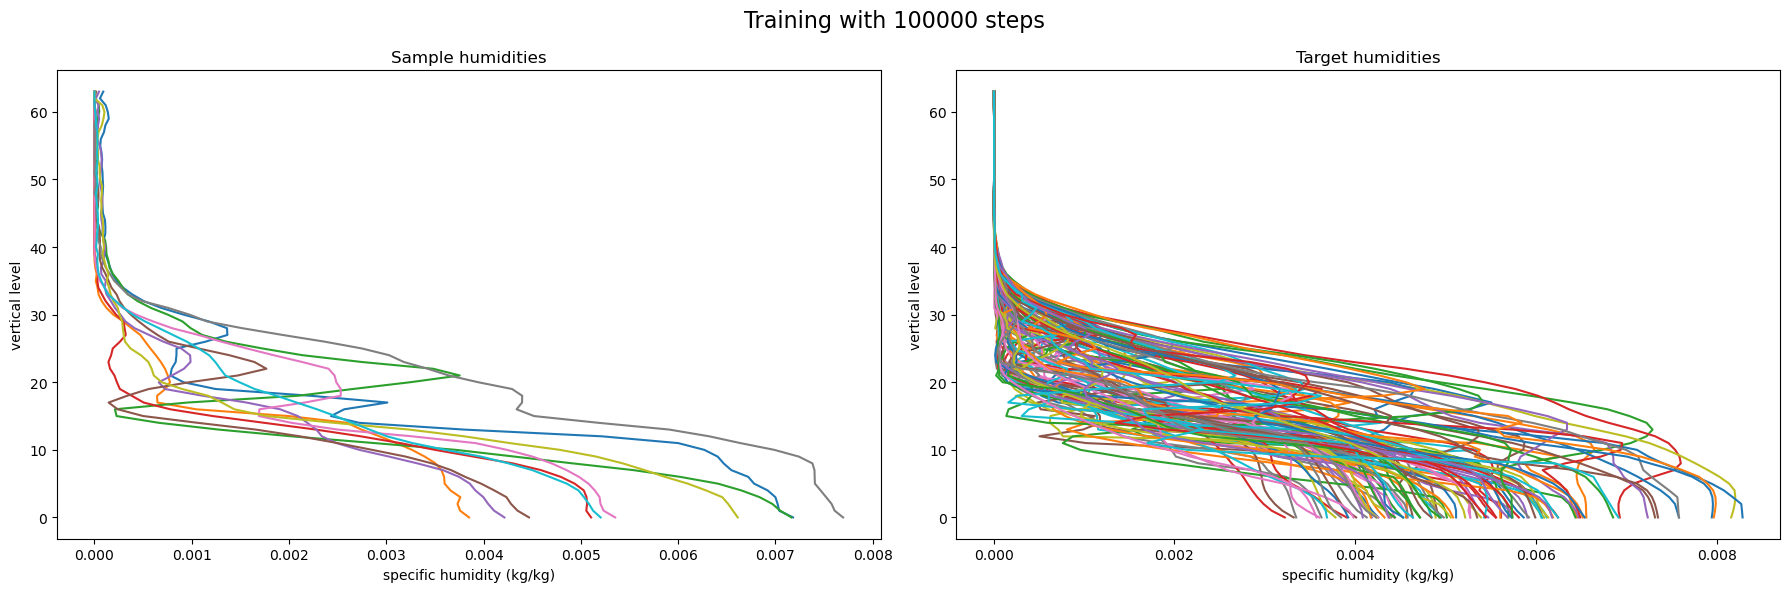

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#Sample humidities plot
sample_humidity = samples[:, 0, :] * 0.025
for i in range(10):
    axs[0].plot(sample_humidity[i], np.arange(64))
axs[0].set_xlabel("specific humidity (kg/kg)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Sample humidities")


# Target humidities plot
target_humidity = training_data[:, 0, :] * 0.025
for i in range(100):
    axs[1].plot(target_humidity[i], np.arange(64))
axs[1].set_xlabel("specific humidity (kg/kg)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Target humidities")

fig.suptitle("Training with 100000 steps", fontsize = 16)

plt.tight_layout()
plt.show()

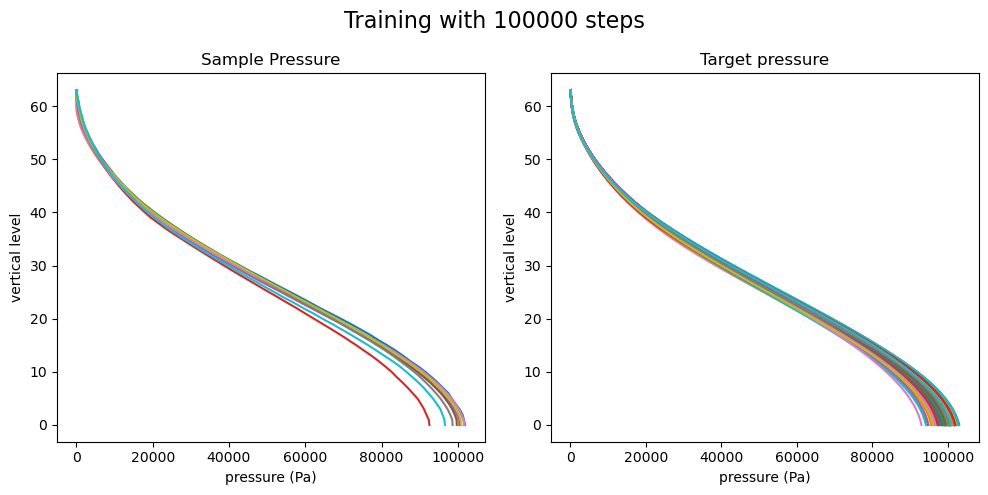

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#Sample pressure plot
sample_pressure = samples[:, 1, :] * 106000
for i in range(10):
    axs[0].plot(sample_pressure[i], np.arange(64))
axs[0].set_xlabel("pressure (Pa)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Sample Pressure")


# Target pressure plot
target_pressure = training_data[:, 1, :] * 106000
for i in range(100):
    axs[1].plot(target_pressure[i], np.arange(64))
axs[1].set_xlabel("pressure (Pa)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Target pressure")

fig.suptitle("Training with 100000 steps", fontsize = 16)

plt.tight_layout()
plt.show()

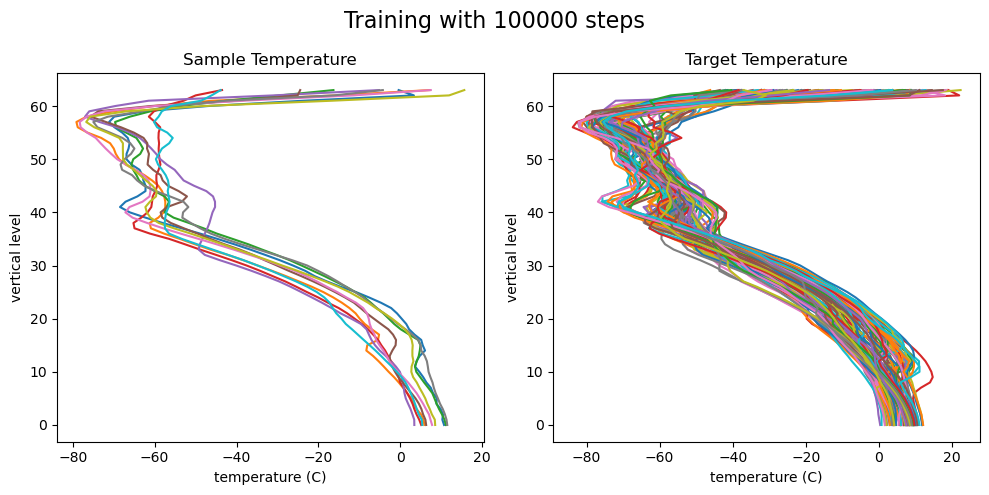

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#Sample temperature plot
sample_temperature = samples[:, 2, :] * 180 + 140 -273.15
for i in range(10):
    axs[0].plot(sample_temperature[i], np.arange(64))
axs[0].set_xlabel("temperature (C)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Sample Temperature")


# Target temperature plot
target_temperature = training_data[:, 2, :] * 180 + 140 -273.15
for i in range(100):
    axs[1].plot(target_temperature[i], np.arange(64))
axs[1].set_xlabel("temperature (C)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Target Temperature")

fig.suptitle("Training with 100000 steps", fontsize = 16)

plt.tight_layout()
plt.show()